Epoch 1/100
352/352 [==============================] - 0s 1ms/step - loss: 10.7410
Epoch 2/100
352/352 [==============================] - 0s 122us/step - loss: 5.4244
Epoch 3/100
352/352 [==============================] - 0s 116us/step - loss: 4.9796
Epoch 4/100
352/352 [==============================] - 0s 111us/step - loss: 4.8731
Epoch 5/100
352/352 [==============================] - 0s 119us/step - loss: 4.7372
Epoch 6/100
352/352 [==============================] - 0s 114us/step - loss: 4.6972
Epoch 7/100
352/352 [==============================] - 0s 114us/step - loss: 4.6469
Epoch 8/100
352/352 [==============================] - 0s 119us/step - loss: 4.5905
Epoch 9/100
352/352 [==============================] - 0s 119us/step - loss: 4.5777
Epoch 10/100
352/352 [==============================] - 0s 111us/step - loss: 4.4751
Epoch 11/100
352/352 [==============================] - 0s 116us/step - loss: 4.5010
Epoch 12/100
352/352 [==============================] - 0s 114us/step - los

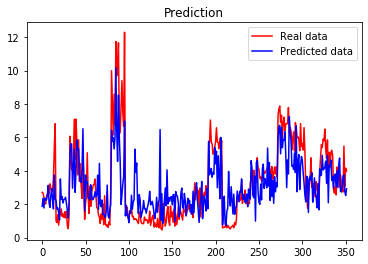

In [88]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('K:/données M2/ANN/terrain.csv',sep=',')
X = dataset.iloc[:, 2:5].values
y = dataset.iloc[:,5].values
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scy = StandardScaler()
#X = sc.fit_transform(X_train)
X = sc.fit_transform(X)
#y = np.array(y).reshape(-1,1)
#y = scy.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 3))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(32, activation = 'relu', input_dim = 3))
# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(16, activation = 'relu', input_dim = 3))
# Adding the third hidden layer
model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dense(1, activation='sigmoid'))
# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X, y, batch_size = 10, epochs = 100)

y_pred = model.predict(X)
#y_pred =  scy.inverse_transform(y_pred)
plt.plot(y, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [89]:
#y =  scy.inverse_transform(y)
y = y.reshape(y.shape[0])
y_pred = y_pred.reshape(y_pred.shape[0])
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})

import numpy as np
import scipy.stats
scipy.stats.pearsonr(y, y_pred) [0]

0.7639518110340613

In [90]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error (MAE): 1.1010555694387718
Root Mean Squared Error (RMSE): 1.4936830066353146


In [91]:
df

,Real Values,Predicted Values
0,2.71,1.873325
1,2.66,2.356420
2,2.42,1.773150
3,2.26,2.356420
4,2.02,2.270408
...,...,...
347,2.73,3.663144
348,5.48,3.763384
349,3.06,2.762891
350,4.16,2.515401


In [92]:
# save model and architecture to single file
model.save("ANN23.01.2021.fin2")